<h1><center>Pattern Recognition using problem Solving CA1</center><h1>

<h2><center>Abstract</center><h2>
<h3>Water point functionality
In 2016 the Government of Sierra Leone in partnership with the African Development Bank (AfDB), UNICEF, UNDP and 
other partners, completed the mapping of 31,345 water points across the country. This provided useful data on 
the functionality of water points. The purpose of the WPM Data was to update the 2012 data and put in place mechanisms 
for the recurrent update of the WPM data once activities had taken place in the field. The WPM data provides an important 
foundation for water sector planning and strategy development.</h3>

<h3>Of the 31,345 points mapped 20,673 are technically functional, a further 2,108 were functional but partly damaged, 
while 6,055 were recorded as broken down. Another 813 points that were still under construction at the time of the survey 
were also mapped. A key figure is the combined number of points that are either fully functional or at least without
major damage.iii There are 22,781 of these in Sierra Leone, of which 18,908 (65.5% of the total) are actually used. 
These are referred to as “protected in-use points” below. The main reason that some protected points are not used is 
pollution i.e. users reporting that the water is unclean (e.g. cloudy, salty, rotten taste etc.). </h3>

<h3>Reference : https://washdata-sl.org/water-point-data/water-point-functionality/<h3>

<h2><center>Dataset description</center><h2>
<h3>
It has 31450 rows of data with total of 49 features and 1 target / label

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the
building that was hit by the earthquake. There are 3 grades of the damage:<h3>
###        1:Yes-Functional (and in use)
###        2:Yes-Functional (but not in use) 
###        3:Yes-But damaged
###        4:No-Broken down
###        5:No-Still under construction
###        6:No-Under rehabilitation

<h2><center>Exploratory data analysis</center><h2>

<h3>Define Function<h3>

In [4]:
#=========================================================================
# Function to Check on data spread and Normality
#=========================================================================

def Normality_Check(feature):
    
    subtitle = feature + ' Data'
    title1 = feature + " Count"
    title2 = feature + ' Spread'
    filename = feature + '_normality_check.png'
    
    # Ploting two figure side by side
    fig = plt.figure(figsize=(60,20)) #  figure
    fig.suptitle(subtitle, fontsize=40, fontweight='bold')
    ax1 = fig.add_subplot(121)
    
    ax1.set_title(title1, fontsize=30)
    ax1.xaxis.set_tick_params(labelsize=30)
    ax1.yaxis.set_tick_params(labelsize=30)
    ax2 = fig.add_subplot(122)
    
    ax2.set_title(title2, fontsize=30)
    ax2.xaxis.set_tick_params(labelsize=30)
    ax2.yaxis.set_tick_params(labelsize=30)

    plt.subplot(121) # 1st figure
    X_drop_col[feature].hist(bins=50)

    plt.subplot(122) # 2nd figure
    X_drop_col.boxplot(column=feature)
    # Save the chart to file
    plt.savefig(filename, bbox_inches="tight")

In [5]:
#=========================================================================
# Function to plot 3 bar charts side by side
#=========================================================================

def bar_chart_plot(feature, ylimit):

    # Ploting three figure side by side
    fig = plt.figure(figsize=(120,50)) 
    fontsize=80
    ylimit = ylimit
    subtitle = 'Water Point FUnctionality vs ' + feature
    title1 = 'Functional vs ' + feature
    title2 = 'Broken down vs ' + feature
    title3 = 'Damaged vs ' + feature
    filename = "water point functionality-vs-" + feature + ".png"

    fig.suptitle(subtitle, fontsize=100, fontweight='bold')

    ax1 = fig.add_subplot(131)
    plt.ylim(0,ylimit)
    ax1.set_title(title1, fontsize=fontsize)
    ax1.set_xlabel(feature, fontsize=fontsize)
    ax1.set_ylabel('Functional Count', fontsize=fontsize)
    ax1.xaxis.set_tick_params(labelsize=fontsize)
    ax1.yaxis.set_tick_params(labelsize=fontsize)

    ax2 = fig.add_subplot(132)
    plt.ylim(0,ylimit)
    ax2.set_title(title2, fontsize=fontsize)
    ax2.set_xlabel(feature, fontsize=fontsize)
    ax2.set_ylabel('Broken down Count', fontsize=fontsize)
    ax2.xaxis.set_tick_params(labelsize=fontsize)
    ax2.yaxis.set_tick_params(labelsize=fontsize)

    ax3 = fig.add_subplot(133)
    plt.ylim(0,ylimit)
    ax3.set_title(title3, fontsize=fontsize)
    ax3.set_xlabel(feature, fontsize=fontsize)
    ax3.set_ylabel('Damaged Count', fontsize=fontsize)
    ax3.xaxis.set_tick_params(labelsize=fontsize)
    ax3.yaxis.set_tick_params(labelsize=fontsize)

    # Plot the Status Group in terms of functional
    plt.subplot(131) # 1st figure
    X_drop_col[X_drop_col['water point functionality'] == '1:Yes – Functional (and in use)'][feature].value_counts().sort_index().plot(kind='bar')

    # Plot the Status Group in terms of non functional
    plt.subplot(132) # 2nd figure
    X_drop_col[X_drop_col['water point functionality'] == '4:No - Broken down'][feature].value_counts().sort_index().plot(kind='bar')

    # Plot the Status Group in terms of functional needs repair
    plt.subplot(133) # 3rd figure
    X_drop_col[X_drop_col['water point functionality'] == '3:Yes - But damaged'][feature].value_counts().sort_index().plot(kind='bar')

    # Save the chart to file
    plt.savefig(filename, bbox_inches="tight")


<h3>Reading dataset Summary<h3>

In [6]:
#=========================================================================
# Import all necessary libraries
#=========================================================================

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

#=========================================================================
# Read dataset using pandas and first 5 rows of data
#=========================================================================

X = pd.read_excel('Water-point-data-SL.xlsx')


In [7]:
#=========================================================================
# Read dataset metric data statistics 
#=========================================================================

# As can see from the summary, all the features has different range
X.describe()

,16230052|EA number,2420047|Latitude,--GEOLON--|Longitude,--GEOELE--|Elevation,9410050|Measure the depth of the well (in metres),"2480001|During the seasonal drought of the well, how long is it not available? (months)",4430055|Year of construction,460037|How many minutes does it take to reach the nearest spare part supplier?
count,2.298400e+04,2.623800e+04,2.623800e+04,26188.000000,2667.000000,12006.000000,26239.000000,26239.000000
mean,1.123480e+11,8.490080e+10,-4.254752e+08,165.667996,17.302212,5.951358,2003.569572,179.094249
std,1.204333e+13,1.375236e+13,6.891208e+10,133.334244,28.696581,65.406959,13.397724,3821.409645
min,0.000000e+00,6.932476e+00,-1.116248e+13,-330.100000,0.000000,0.000000,1930.000000,0.000000
25%,0.000000e+00,7.912348e+00,-1.270489e+01,76.000000,10.000000,2.000000,2000.000000,20.000000
50%,0.000000e+00,8.331851e+00,-1.175469e+01,122.000000,15.000000,3.000000,2008.000000,50.000000
75%,4.000000e+00,8.657486e+00,-1.120142e+01,213.125000,18.000000,3.000000,2013.000000,120.000000
max,1.291082e+15,2.227627e+15,1.369270e+05,4592.100000,1222.000000,2014.000000,2017.000000,600000.000000


In [8]:
# rename column names
X = X.rename(columns= lambda x: x[x.find('|')+1 if x.find('|') != -1 else 0:].lower().strip())
X.head()

,submission date,ea number,community name,water point name,location,latitude,longitude,elevation,geo code,photo,...,do you think the community is still odf?,are there functioning latrines in this village?,do the latrines have handwashing facilities?,are there trained natural odf leaders in this community?,are the trained natural odf leaders performing their role effectively?,observations about toilet,observe presence of water at the specific place for hand washing,observe what device is present for hand washing,record if soap or detergent is present at the specific place for hand washing,unnamed: 48
0,30-07-2016 19:55:22 CEST,14.0,semabu,Community pump,South|Bonthe|Bonthe Urban|Bonthe Town,7.523658,-12.500999,50.0,9lmqrpu9,https://akvoflow-110.s3.amazonaws.com/images/d...,...,NaN,NaN,NaN,NaN,NaN,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,72849e96c5fe978793072373c77cae1
1,01-01-2016 21:16:53 CET,7.0,mabonto,magburaka road,Tonkolili|Kafe Simiria|Mabonto,8.860831,-11.812625,150.1,bb270dny,https://akvoflow-110.s3.amazonaws.com/images/e...,...,NaN,NaN,NaN,NaN,NaN,6:Toilet looks good,2:Water is not available,1:No device present,5:None,f0563f79f4dcc28f9d5877242bffc0f7
2,31-07-2016 14:02:45 CEST,0.0,Hoya,Hoya community,Bonthe|Kwamebai Krim|Kpanga Koimato,7.253449,-11.895057,19.0,997v5s4m,https://akvoflow-110.s3.amazonaws.com/images/7...,...,Yes,Don't know,NaN,Don't know,NaN,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,fe37be7ea17d66def2b35bc0acfab6
3,12-08-2016 10:55:37 CEST,42060310.0,KINGTOM,KINGTOM,West |Western Urban|West I|Kingtom,8.486413,-13.242527,53.0,atuz0oll,https://akvoflow-110.s3.amazonaws.com/images/f...,...,NaN,NaN,NaN,NaN,NaN,6:Toilet looks good,1:Water is available,1:No device present,5:None,9926f17932c2236afa146815dc5272d1
4,14-08-2016 22:04:19 CEST,0.0,Jusu Stre Nikibu Section,2Jusu street Nikibu section,South|Bo|Bo Town|West Ward-Nikibu - Bo School,7.958622,-11.754123,6.5,a5m3r82t,https://akvoflow-110.s3.amazonaws.com/images/4...,...,NaN,NaN,NaN,NaN,NaN,6:Toilet looks good,1:Water is available,5:Water kettle/cooler,1:Bar soap,968187f339c82117135613ddfb3d2f2


<h3>Checking Dataset statistics<h3>

In [9]:
#=========================================================================================================
# Read dataset any missing data 
#=========================================================================================================

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31451 entries, 0 to 31450
Data columns (total 49 columns):
submission date                                                                    26241 non-null object
ea number                                                                          22984 non-null float64
community name                                                                     26238 non-null object
water point name                                                                   26239 non-null object
location                                                                           26238 non-null object
latitude                                                                           26238 non-null float64
longitude                                                                          26238 non-null float64
elevation                                                                          26188 non-null float64
geo code                                       

In [10]:
X.isnull().sum()

submission date                                                                     5210
ea number                                                                           8467
community name                                                                      5213
water point name                                                                    5212
location                                                                            5213
latitude                                                                            5213
longitude                                                                           5213
elevation                                                                           5263
geo code                                                                            5228
photo                                                                               5212
type of water point                                                                 5210
extraction system typ

<h3>Create Pump_Age from Submission Date - construction_year. <h3>

In [11]:
X['submission date'] = pd.to_datetime(X['submission date'])
X['year'] = X['submission date'].dt.year
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,submission date,ea number,community name,water point name,location,latitude,longitude,elevation,geo code,photo,...,are there functioning latrines in this village?,do the latrines have handwashing facilities?,are there trained natural odf leaders in this community?,are the trained natural odf leaders performing their role effectively?,observations about toilet,observe presence of water at the specific place for hand washing,observe what device is present for hand washing,record if soap or detergent is present at the specific place for hand washing,unnamed: 48,year
0,2016-07-30 19:55:22,14.0,semabu,Community pump,South|Bonthe|Bonthe Urban|Bonthe Town,7.523658,-12.500999,50.0,9lmqrpu9,https://akvoflow-110.s3.amazonaws.com/images/d...,...,NaN,NaN,NaN,NaN,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,72849e96c5fe978793072373c77cae1,2016.0
1,2016-01-01 21:16:53,7.0,mabonto,magburaka road,Tonkolili|Kafe Simiria|Mabonto,8.860831,-11.812625,150.1,bb270dny,https://akvoflow-110.s3.amazonaws.com/images/e...,...,NaN,NaN,NaN,NaN,6:Toilet looks good,2:Water is not available,1:No device present,5:None,f0563f79f4dcc28f9d5877242bffc0f7,2016.0
2,2016-07-31 14:02:45,0.0,Hoya,Hoya community,Bonthe|Kwamebai Krim|Kpanga Koimato,7.253449,-11.895057,19.0,997v5s4m,https://akvoflow-110.s3.amazonaws.com/images/7...,...,Don't know,NaN,Don't know,NaN,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,fe37be7ea17d66def2b35bc0acfab6,2016.0
3,2016-12-08 10:55:37,42060310.0,KINGTOM,KINGTOM,West |Western Urban|West I|Kingtom,8.486413,-13.242527,53.0,atuz0oll,https://akvoflow-110.s3.amazonaws.com/images/f...,...,NaN,NaN,NaN,NaN,6:Toilet looks good,1:Water is available,1:No device present,5:None,9926f17932c2236afa146815dc5272d1,2016.0
4,2016-08-14 22:04:19,0.0,Jusu Stre Nikibu Section,2Jusu street Nikibu section,South|Bo|Bo Town|West Ward-Nikibu - Bo School,7.958622,-11.754123,6.5,a5m3r82t,https://akvoflow-110.s3.amazonaws.com/images/4...,...,NaN,NaN,NaN,NaN,6:Toilet looks good,1:Water is available,5:Water kettle/cooler,1:Bar soap,968187f339c82117135613ddfb3d2f2,2016.0


In [12]:
mean_year =  int(X['year of construction'].mean())
mean_year

2003

In [13]:
X['year of construction'].fillna(mean_year, inplace=True)
X['year of construction'].head()

0    2012.0
1    1987.0
2    2007.0
3    2016.0
4    2007.0
Name: year of construction, dtype: float64

In [14]:
X['Pump_Age'] = X['year']-X['year of construction']

In [15]:
# As Standardscalar cannot convert ""<" and ">" characters, hence need to replace
X['how reliable is the water point?'] = X['how reliable is the water point?'].replace(regex=['<'], value='smaller')
X['how reliable is the water point?'] = X['how reliable is the water point?'].replace(regex=['>'], value='greater')

<h3>water point functionality<h3>
<h3>Remove target/label 5 & 6 as we are not looking for that and combine 1 & 2 seems they are both funcitonal<h3>

In [16]:
# Get names of indexes for which column has value '5:No - Still under construction'
indexNames = X[X['water point functionality'] == '5:No - Still under construction'].index
 
# Delete these row indexes from dataFrame
X.drop(indexNames , inplace=True)

In [17]:
# Get names of indexes for which column Age has value 30
indexNames = X[X['water point functionality'] == '6:No - Under rehabilitation'].index
 
# Delete these row indexes from dataFrame
X.drop(indexNames , inplace=True)
X['water point functionality'].value_counts()

1:Yes – Functional (and in use)        17321
4:No - Broken down                      5078
3:Yes - But damaged                     1733
2:Yes – Functional (but not in use)     1277
Name: water point functionality, dtype: int64

<h3>Rename some long column names and regroup some category to OTHER<h3>

In [18]:
## extraction_type
X['extraction_type'] = X['extraction system type']
X.loc[X['extraction_type'].str.contains('OTHER:', case=False, na=False), 'extraction_type'] = 'OTHER'

In [19]:
# waterpoint type
X['waterpoint_type'] = X['type of water point']
X.loc[X['waterpoint_type'].str.contains('OTHER', case=False, na=False), 'waterpoint_type'] = 'OTHER'

In [20]:
# broke_down_repair
X['broke_down_repair'] = X['last time the water point broke down, how long did it take to repair?']

In [21]:
# management_committee
X['management_committee'] = X['is there a wash management committee?']

In [22]:
# water_point_type
X['owns_water_point'] = X['who owns the water point?']

<h3>Dropping redundant or huge missing data features<h3>

In [23]:
# Dropping the redundant features and the "too many missing data" features

X_drop_col = X.drop(['pump type','number of taps at this point','unnamed: 48',
                     'measure the depth of the well (in metres)','community name',
                     'when did the water point break down?','why is this point not used for drinking water?',
                     'during the seasonal drought of the well, how long is it not available? (months)',
                     'is the wash management committee functioning?','extraction system type',
                     'were trained mechanics provided with toolkits?','elevation',
                     'do you think the community is still odf?','is the water paid for at this point?',
                     'are there functioning latrines in this village?','year','type of water point',
                     'do the latrines have handwashing facilities?', 'others installer / implementing agency',
                     'observations about toilet','ea number','is the water clean or is there a quality problem?',
                     'are there trained natural odf leaders in this community?','submission date',
                     'water point name', 'photo','year of construction','is there a wash management committee?',
                     'are the trained natural odf leaders performing their role effectively?',
                     'observe presence of water at the specific place for hand washing','location',
                     'observe what device is present for hand washing','installer / implementing agency',
                     'record if soap or detergent is present at the specific place for hand washing',
                     'are you able to measure the depth of well?','is/was this point used for drinking water',
                     'last time the water point broke down, how long did it take to repair?',
                     'is/was this point monthly or regularly chlorinated?','is water available throughout the year?',
                     'how reliable is the water point?','does this water point have any damage?',
                     'how many minutes does it take to reach the nearest spare part supplier?',
                     'who is maintaining the water point (routine repairs)?','geo code','who owns the water point?',
                     'is there a trained mechanic available at this point?','has the community been declared odf?'
                     ],axis=1)

X_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30621 entries, 0 to 31450
Data columns (total 9 columns):
latitude                     25408 non-null float64
longitude                    25408 non-null float64
water point functionality    25409 non-null object
Pump_Age                     25411 non-null float64
extraction_type              22490 non-null object
waterpoint_type              25411 non-null object
broke_down_repair            24979 non-null object
management_committee         25409 non-null object
owns_water_point             25409 non-null object
dtypes: float64(3), object(6)
memory usage: 2.3+ MB


<h3> Processing Missing data<h3>

In [24]:
X_drop_col['water point functionality'].replace('', np.nan, inplace=True)
X_drop_col.dropna(subset=['water point functionality'], inplace=True)

In [25]:
X_drop_col['management_committee'].replace('', np.nan, inplace=True)
X_drop_col.dropna(subset=['management_committee'], inplace=True)

In [26]:
X_drop_col['extraction_type'].replace('', np.nan, inplace=True)
X_drop_col.dropna(subset=['extraction_type'], inplace=True)

In [27]:
X_drop_col['broke_down_repair'].replace('', np.nan, inplace=True)
X_drop_col.dropna(subset=['broke_down_repair'], inplace=True)

In [28]:
X_drop_col['waterpoint_type'].replace('', np.nan, inplace=True)
X_drop_col.dropna(subset=['waterpoint_type'], inplace=True)

In [29]:
# filter away rows that have out-of-range lat, lon
X_drop_col = X_drop_col[X_drop_col['longitude'].between(-90,0)]
X_drop_col = X_drop_col[X_drop_col['latitude'].between(0,180)]

In [30]:
X_drop_col.dropna(subset=['longitude'], inplace=True)
X_drop_col.dropna(subset=['latitude'], inplace=True)

In [31]:
X_drop_col.isnull().sum()

latitude                     0
longitude                    0
water point functionality    0
Pump_Age                     0
extraction_type              0
waterpoint_type              0
broke_down_repair            0
management_committee         0
owns_water_point             0
dtype: int64

In [32]:
X_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22461 entries, 0 to 31449
Data columns (total 9 columns):
latitude                     22461 non-null float64
longitude                    22461 non-null float64
water point functionality    22461 non-null object
Pump_Age                     22461 non-null float64
extraction_type              22461 non-null object
waterpoint_type              22461 non-null object
broke_down_repair            22461 non-null object
management_committee         22461 non-null object
owns_water_point             22461 non-null object
dtypes: float64(3), object(6)
memory usage: 1.7+ MB


In [33]:
y = X_drop_col['water point functionality'] # Target / Label
y = pd.DataFrame(y)
y.rename(columns = {'water point functionality':'Functionality'})
y = pd.DataFrame(y)
y.head()

,water point functionality
0,1:Yes – Functional (and in use)
2,4:No - Broken down
4,1:Yes – Functional (and in use)
5,1:Yes – Functional (and in use)
6,1:Yes – Functional (and in use)


In [34]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22461 entries, 0 to 31449
Data columns (total 1 columns):
water point functionality    22461 non-null object
dtypes: object(1)
memory usage: 351.0+ KB


<h3>Check Dataset Features influence the water point functionality<h3>

In [35]:
X_drop_col['water point functionality'].value_counts()

1:Yes – Functional (and in use)        15332
4:No - Broken down                      4552
3:Yes - But damaged                     1573
2:Yes – Functional (but not in use)     1004
Name: water point functionality, dtype: int64

In [36]:
# feature check 
X_drop_col['broke_down_repair'].value_counts()

1:Water point has never broken down    7045
4:Over a month                         5113
5:More than a year                     4449
6:I don't know                         2174
3:Over a week                          2014
2:Less than a week                     1666
Name: broke_down_repair, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

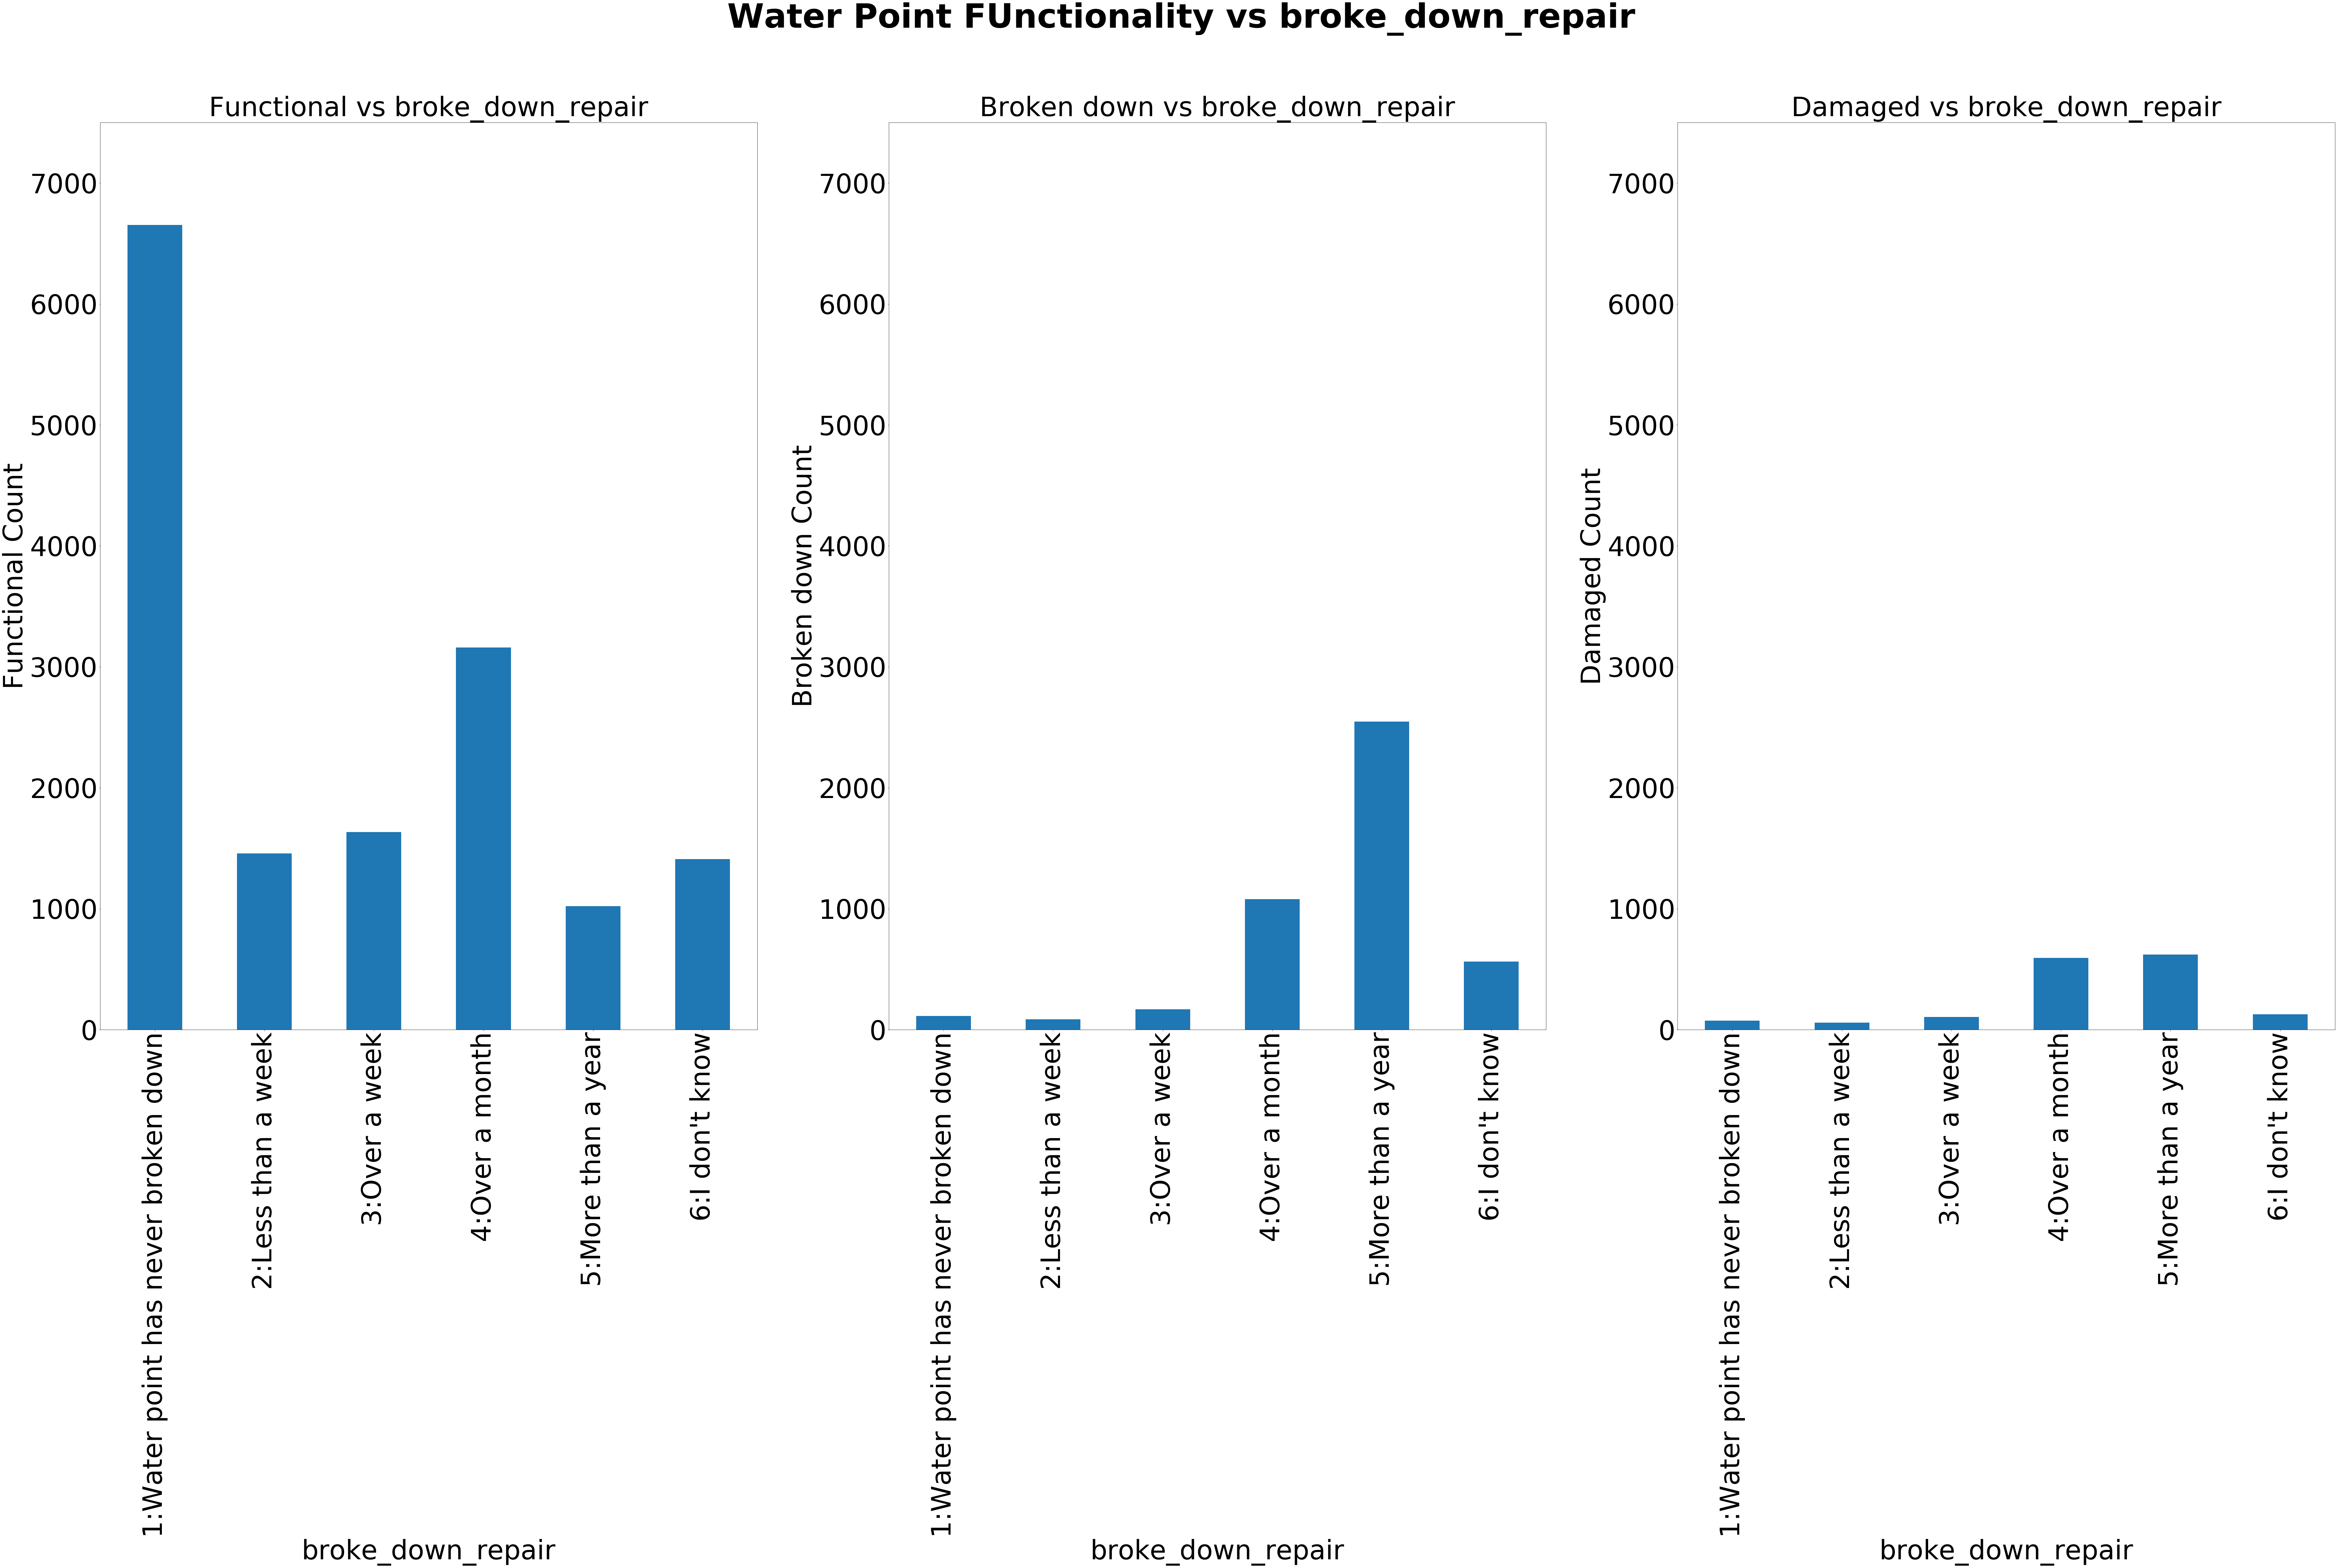

In [37]:
bar_chart_plot('broke_down_repair',7500)

In [38]:
# feature check :
X_drop_col['owns_water_point'].value_counts()

1:Community             11994
8:Private Individual     6497
5:School                 2348
6:Health Facility         774
7:Other Institution       524
4:SALWACO                  91
2:NGO                      79
3:GUMA                     74
9:Unknown                  59
10:CBO                     21
Name: owns_water_point, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

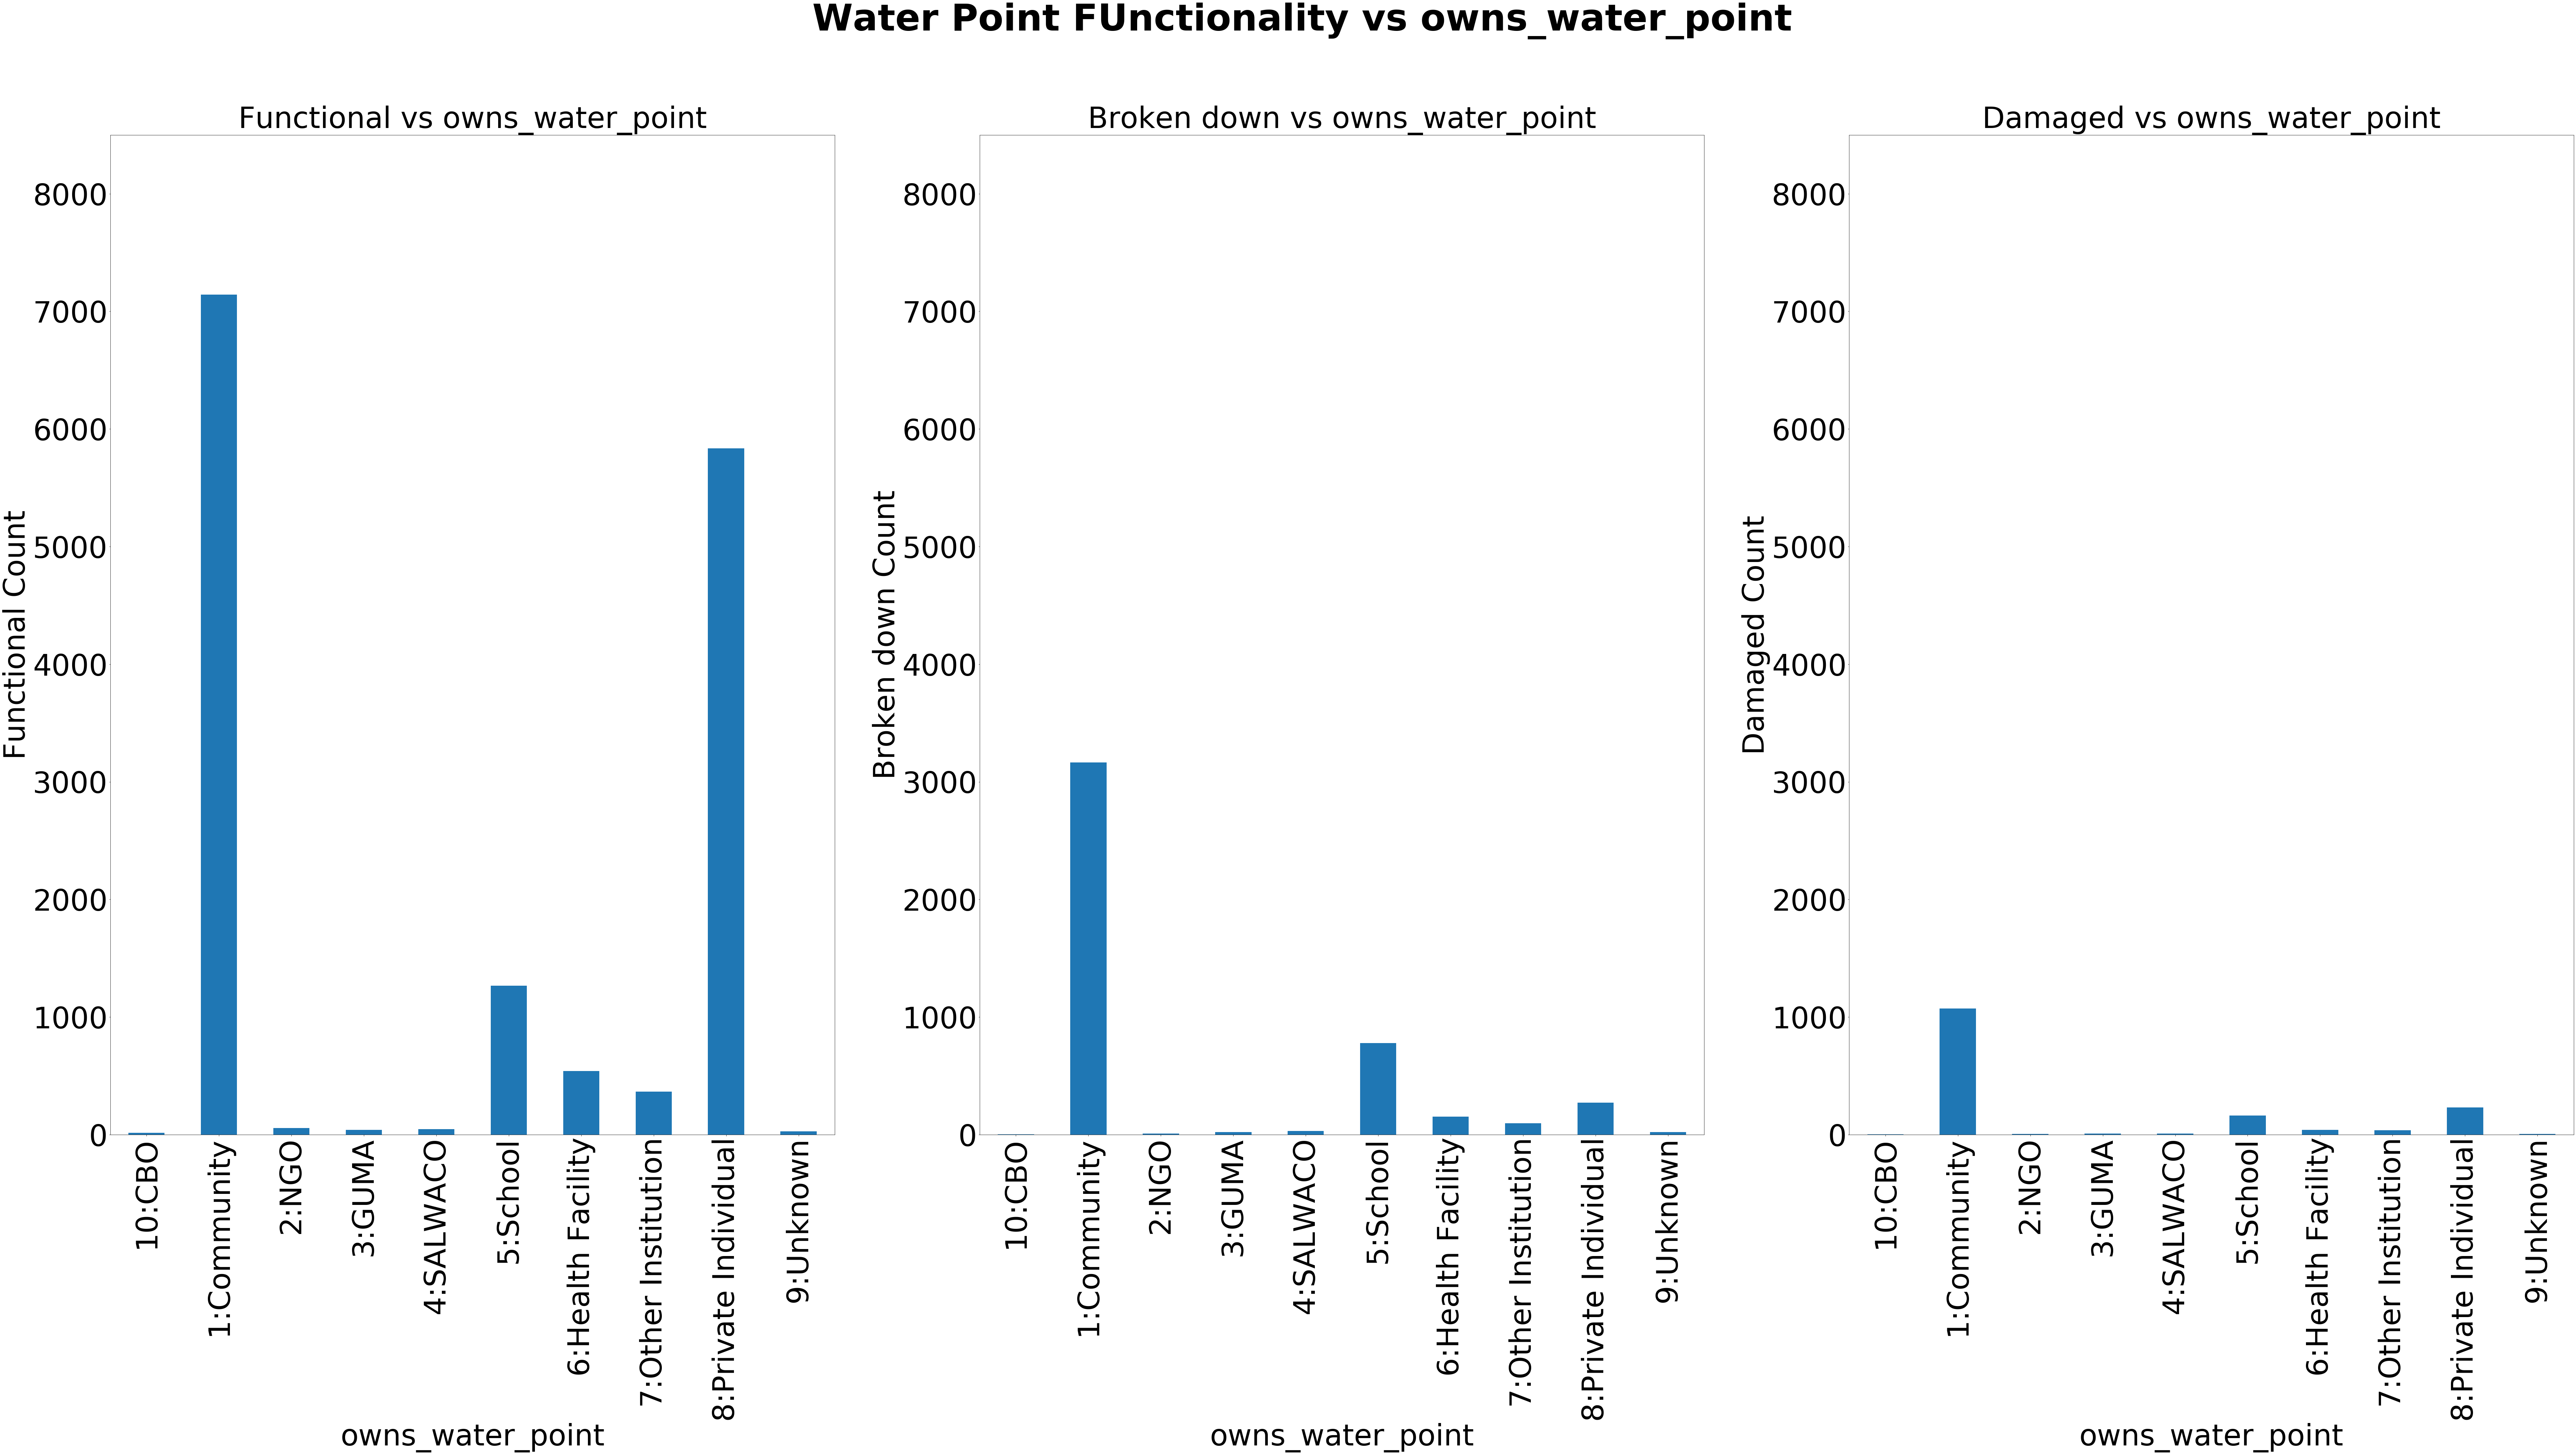

In [39]:
bar_chart_plot('owns_water_point',8500)

In [40]:
# feature check : 
X_drop_col['management_committee'].value_counts()

2:No         11670
1:Yes         8636
3:Unknown     2155
Name: management_committee, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

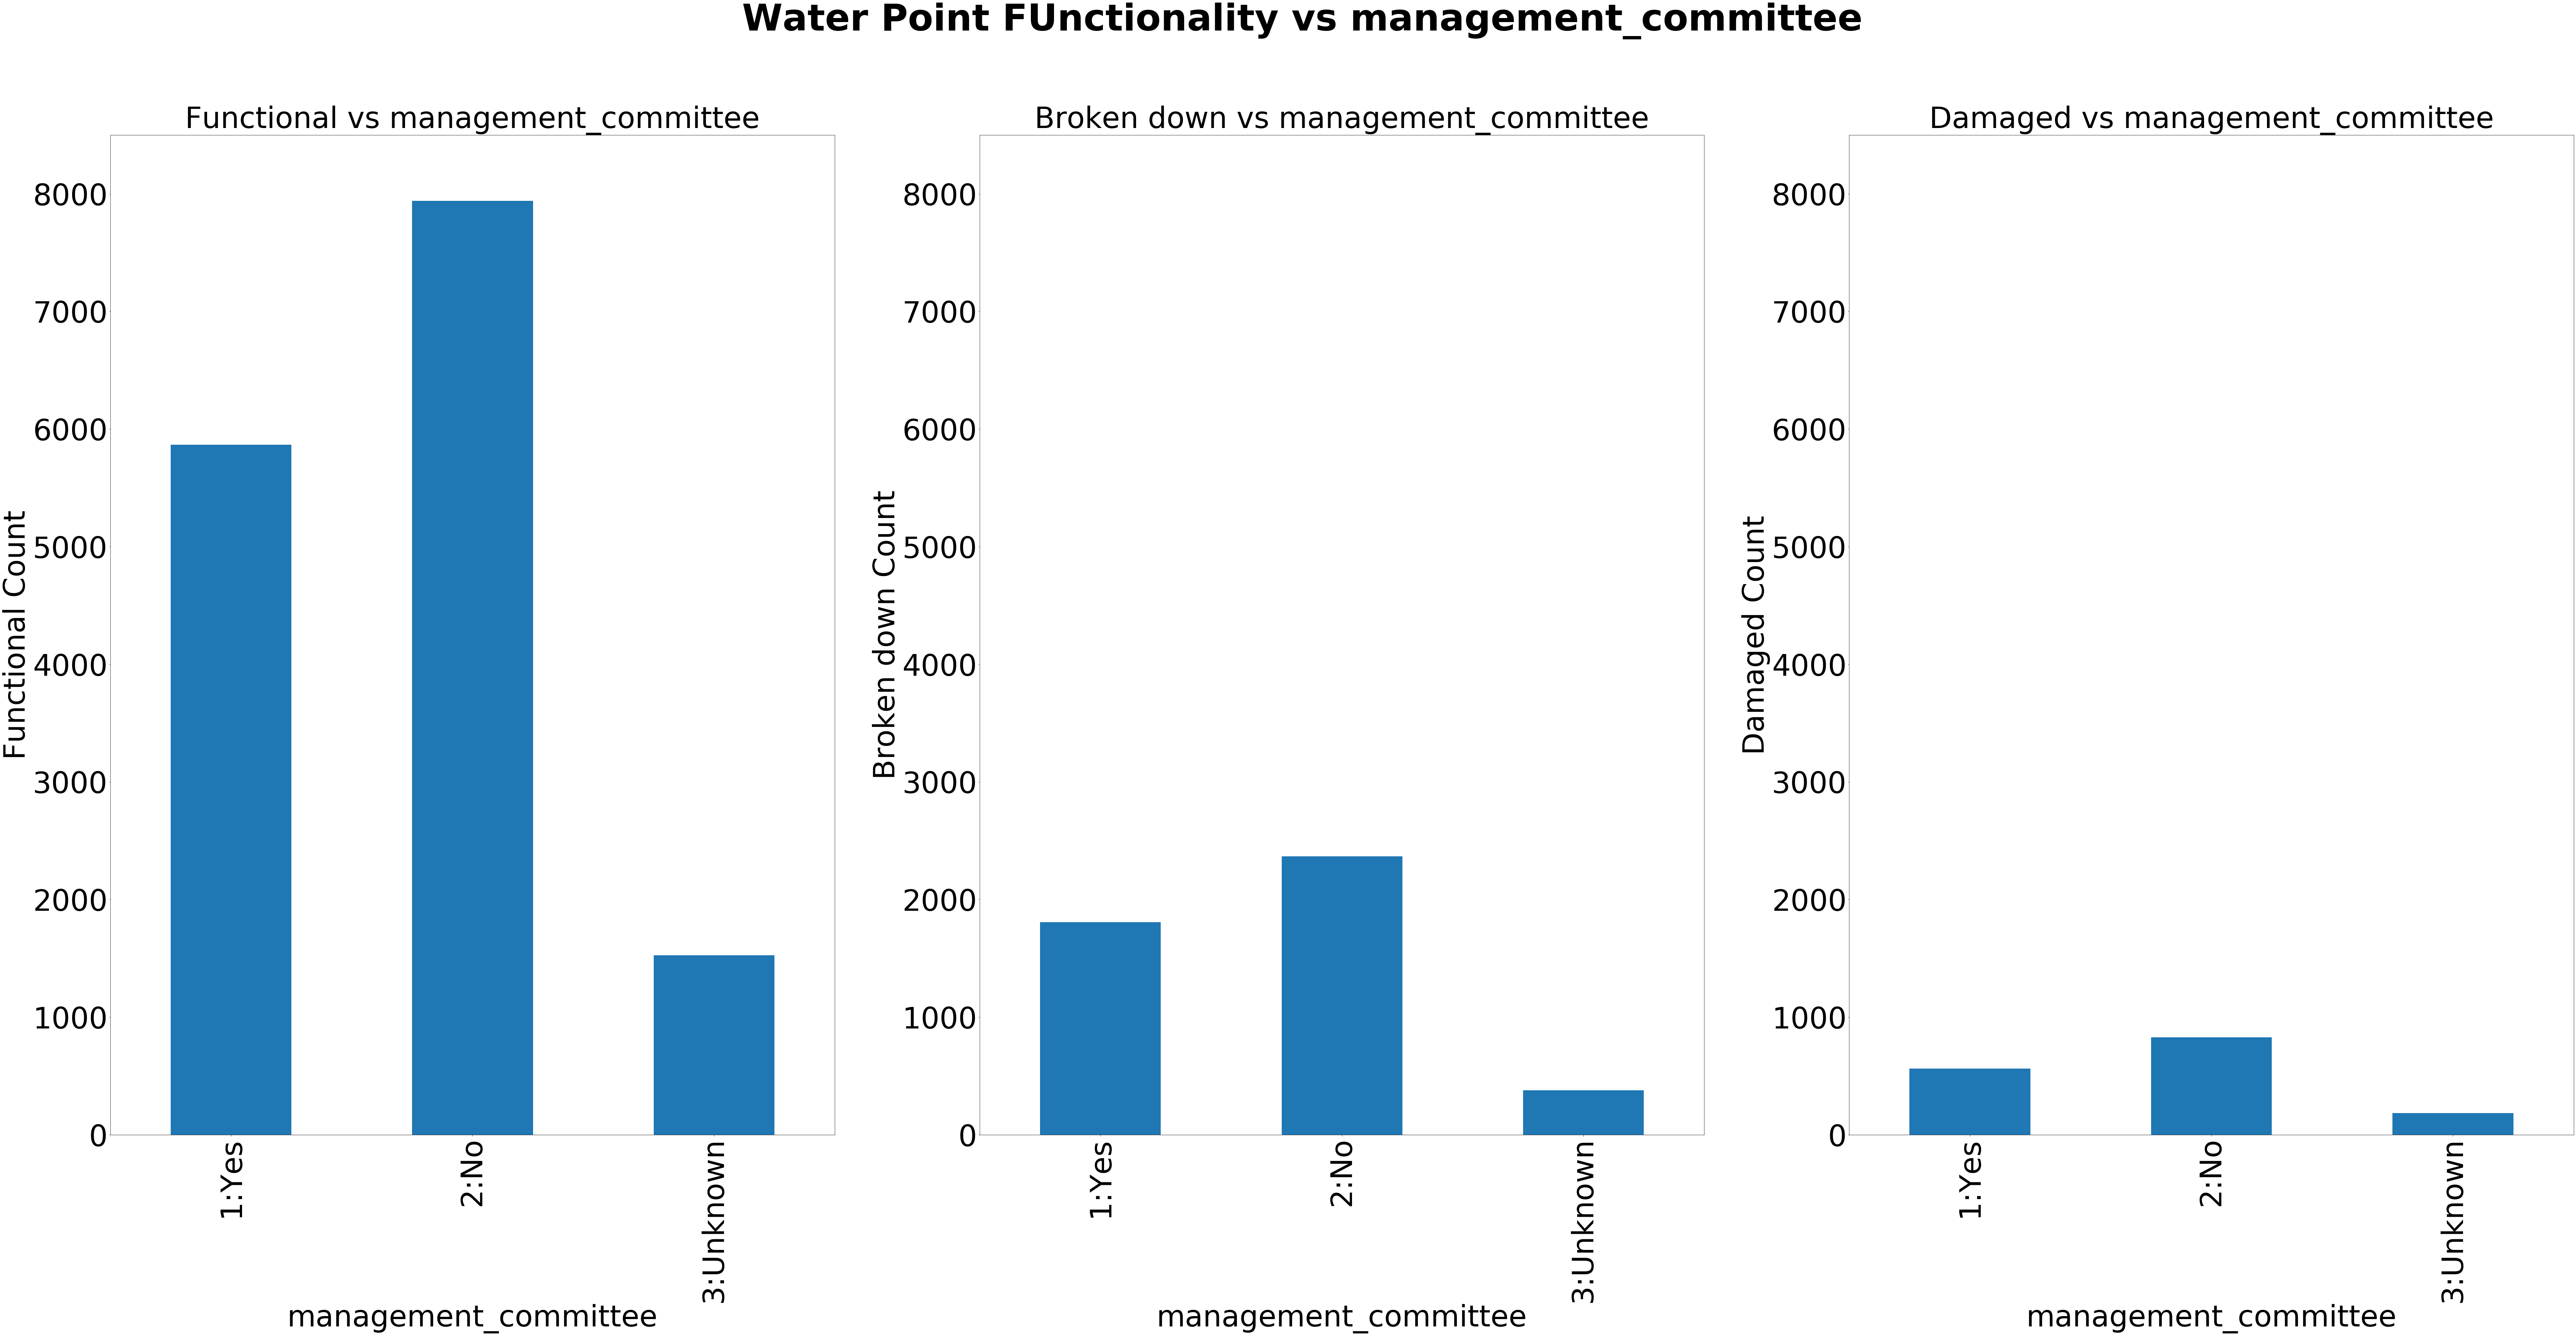

In [41]:
bar_chart_plot('management_committee',8500)

In [42]:
# feature check :
X_drop_col['Pump_Age'].value_counts()

 3.0     1717
 4.0     1463
 6.0     1372
 2.0     1338
 1.0     1197
 5.0     1188
 0.0     1140
 8.0      945
 7.0      897
 13.0     820
 12.0     789
 11.0     772
 10.0     756
 30.0     744
 14.0     692
 9.0      672
 16.0     609
 15.0     395
 31.0     365
 26.0     345
 27.0     319
 28.0     264
 18.0     253
 24.0     247
 17.0     225
 32.0     221
 29.0     212
 34.0     211
 36.0     191
 25.0     187
         ... 
 52.0       5
-17.0       5
-2.0        4
-23.0       4
-10.0       4
-28.0       4
-26.0       4
-27.0       3
-21.0       3
-11.0       3
 83.0       3
 50.0       3
 76.0       3
 64.0       3
-4.0        2
 73.0       2
 55.0       2
 58.0       2
 60.0       2
-8.0        2
-13.0       2
 53.0       2
 85.0       1
-7.0        1
-24.0       1
-14.0       1
-18.0       1
 62.0       1
-5.0        1
 47.0       1
Name: Pump_Age, Length: 113, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

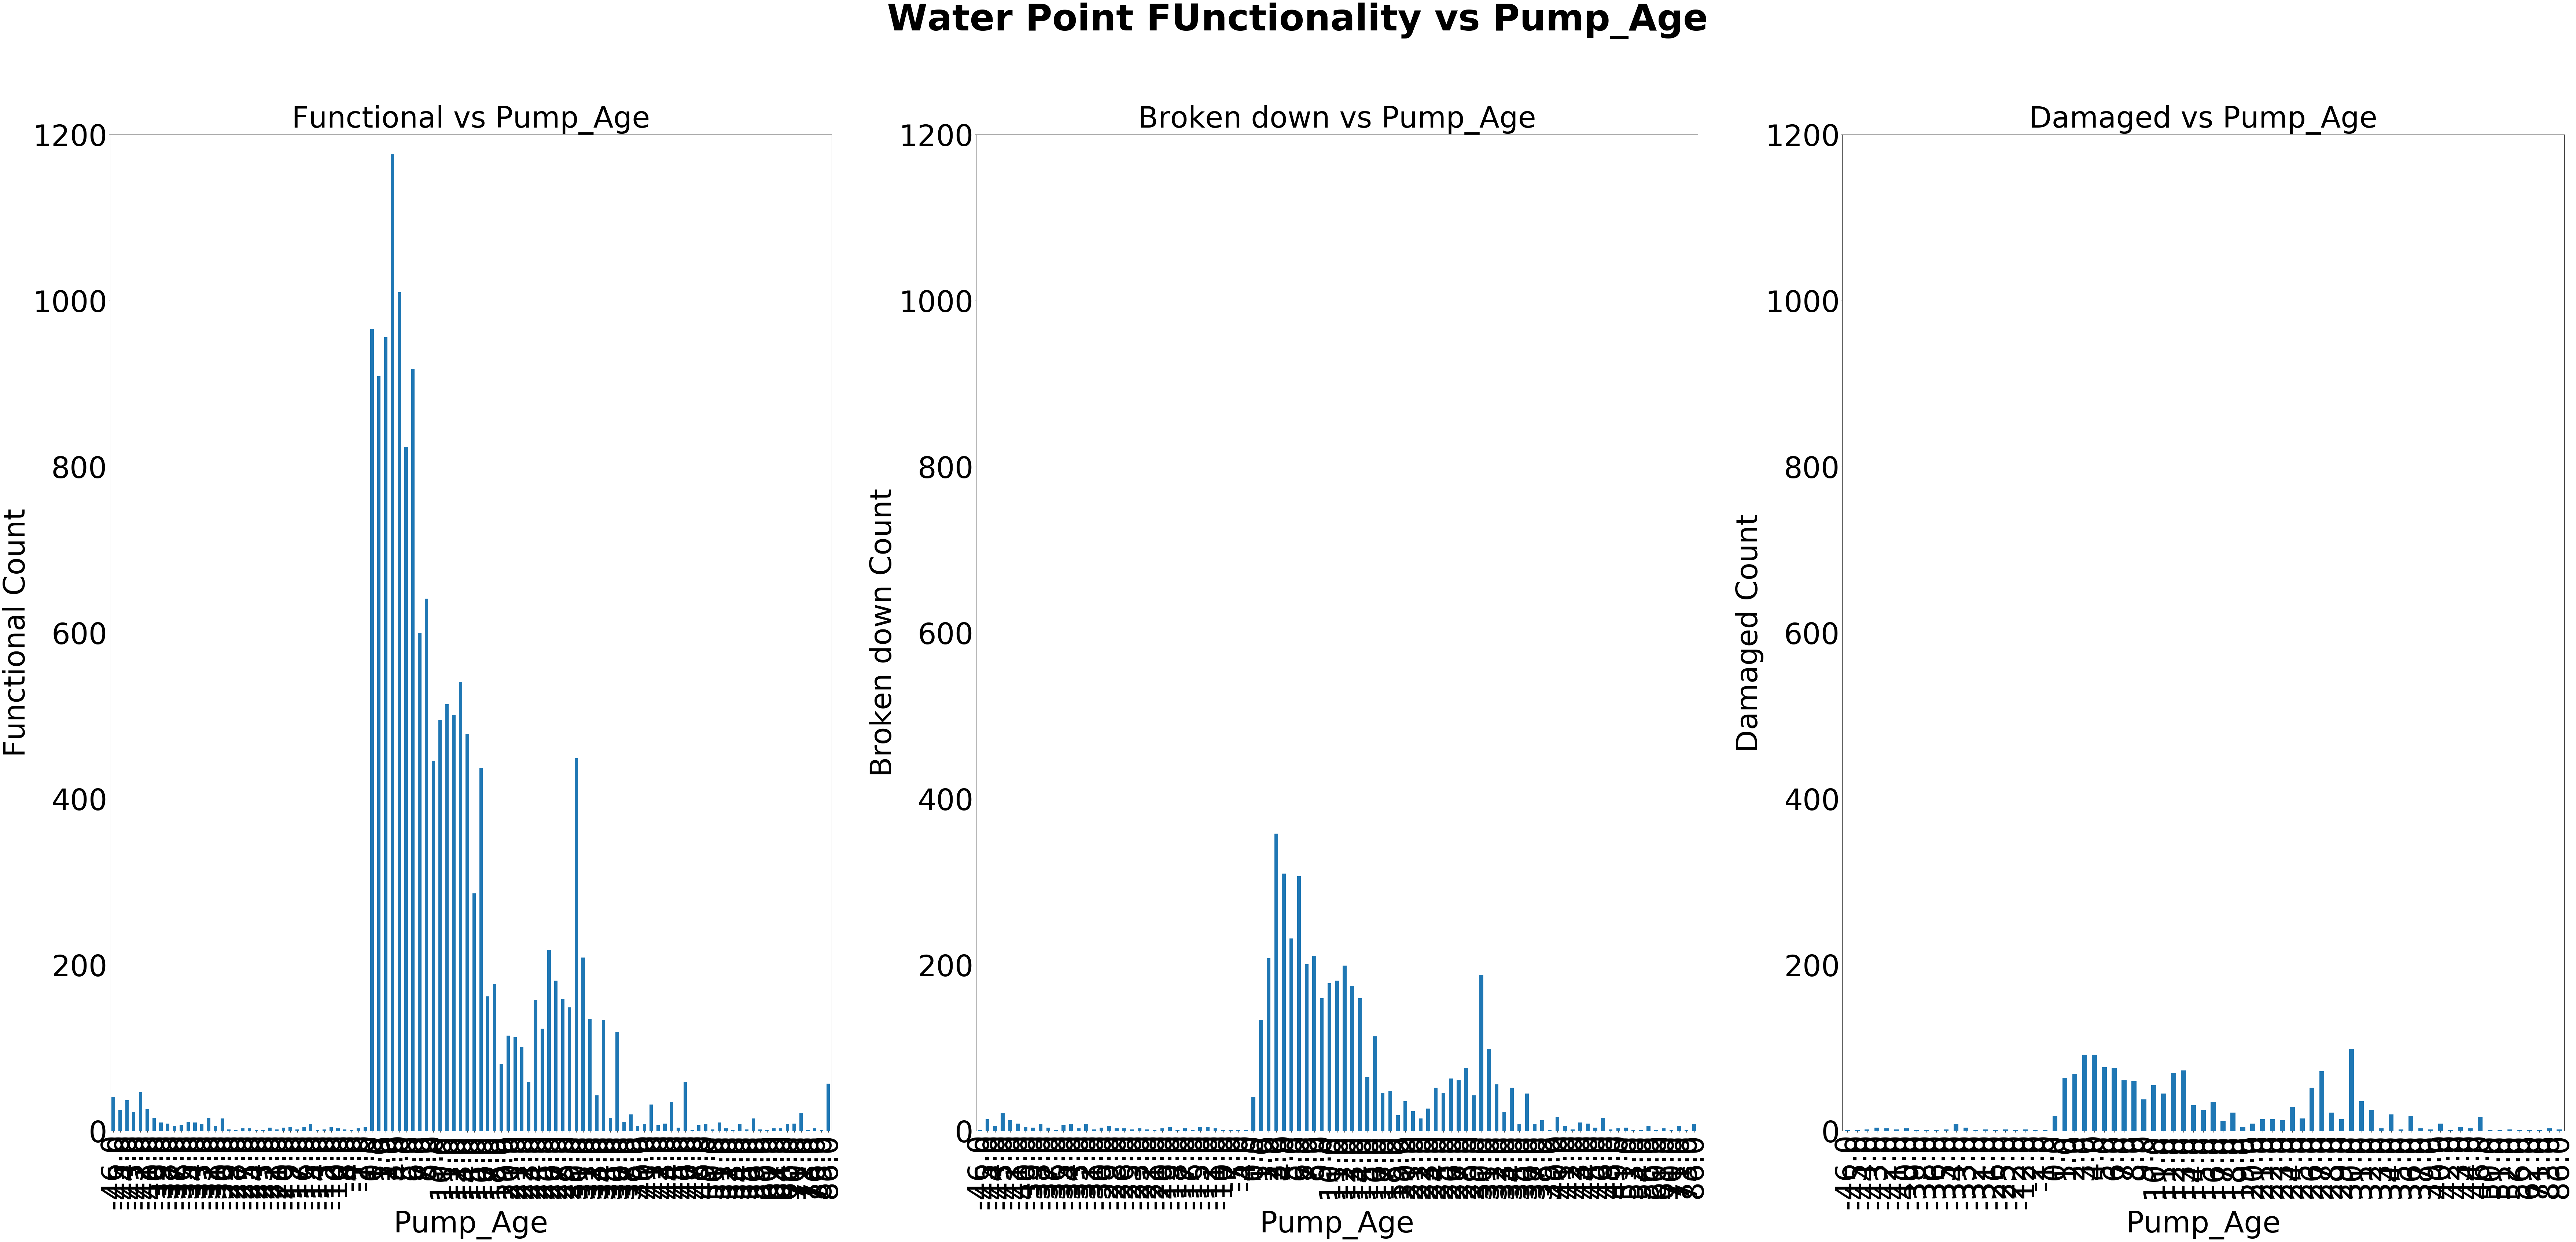

In [43]:
bar_chart_plot('Pump_Age',1200)

In [44]:
# feature check :
X_drop_col['extraction_type'].value_counts()

1:Hand pump                                      11773
7:Hand manual (e.g. rope pump, rope & bucket)     5991
5:Gravity                                         3028
4:Hydram pump                                      637
OTHER                                              505
2:Submersible pump                                 439
3:Surface pump                                      88
Name: extraction_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

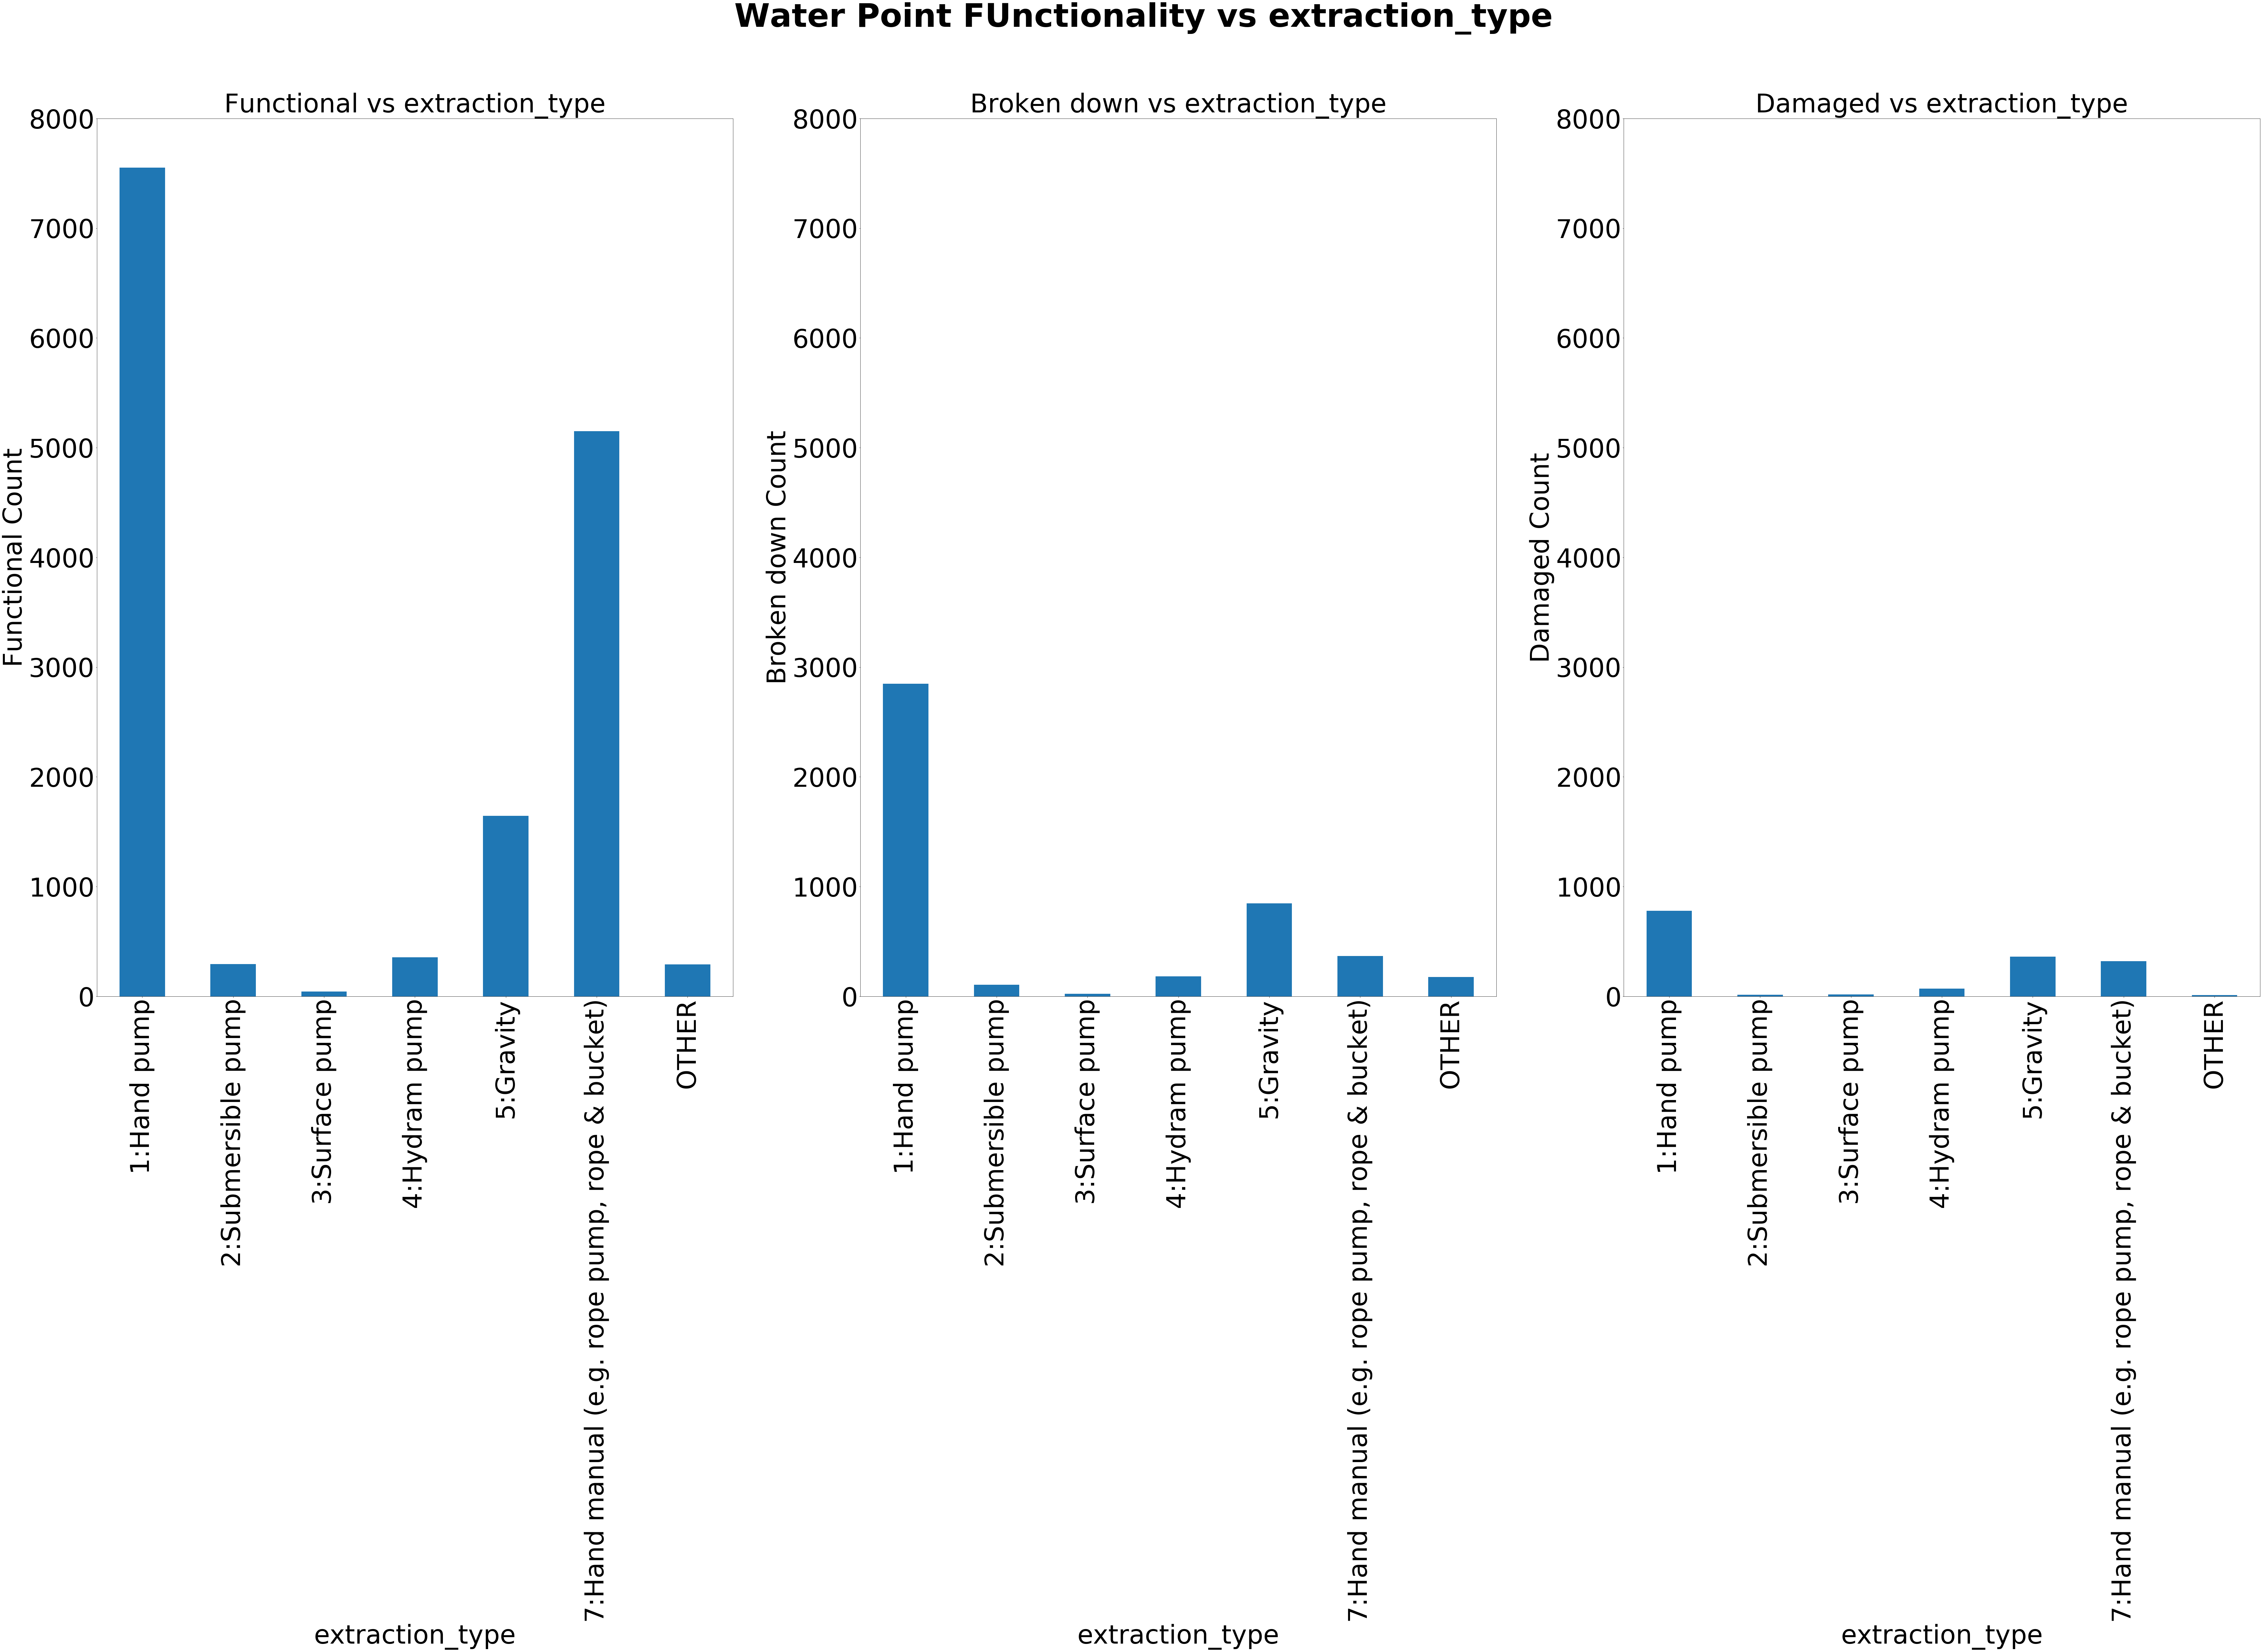

In [45]:
bar_chart_plot('extraction_type',8000)

In [46]:
# feature check :
X_drop_col['waterpoint_type'].value_counts()

2:Protected dug well                                  11954
6:Public tap/standpipe (stand-alone or water kiosk     3981
9:Unprotected dug well                                 3921
3:Tube well or borehole                                2122
5:Sand/Sub-surface dam (with well or standpipe)         482
OTHER                                                     1
Name: waterpoint_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

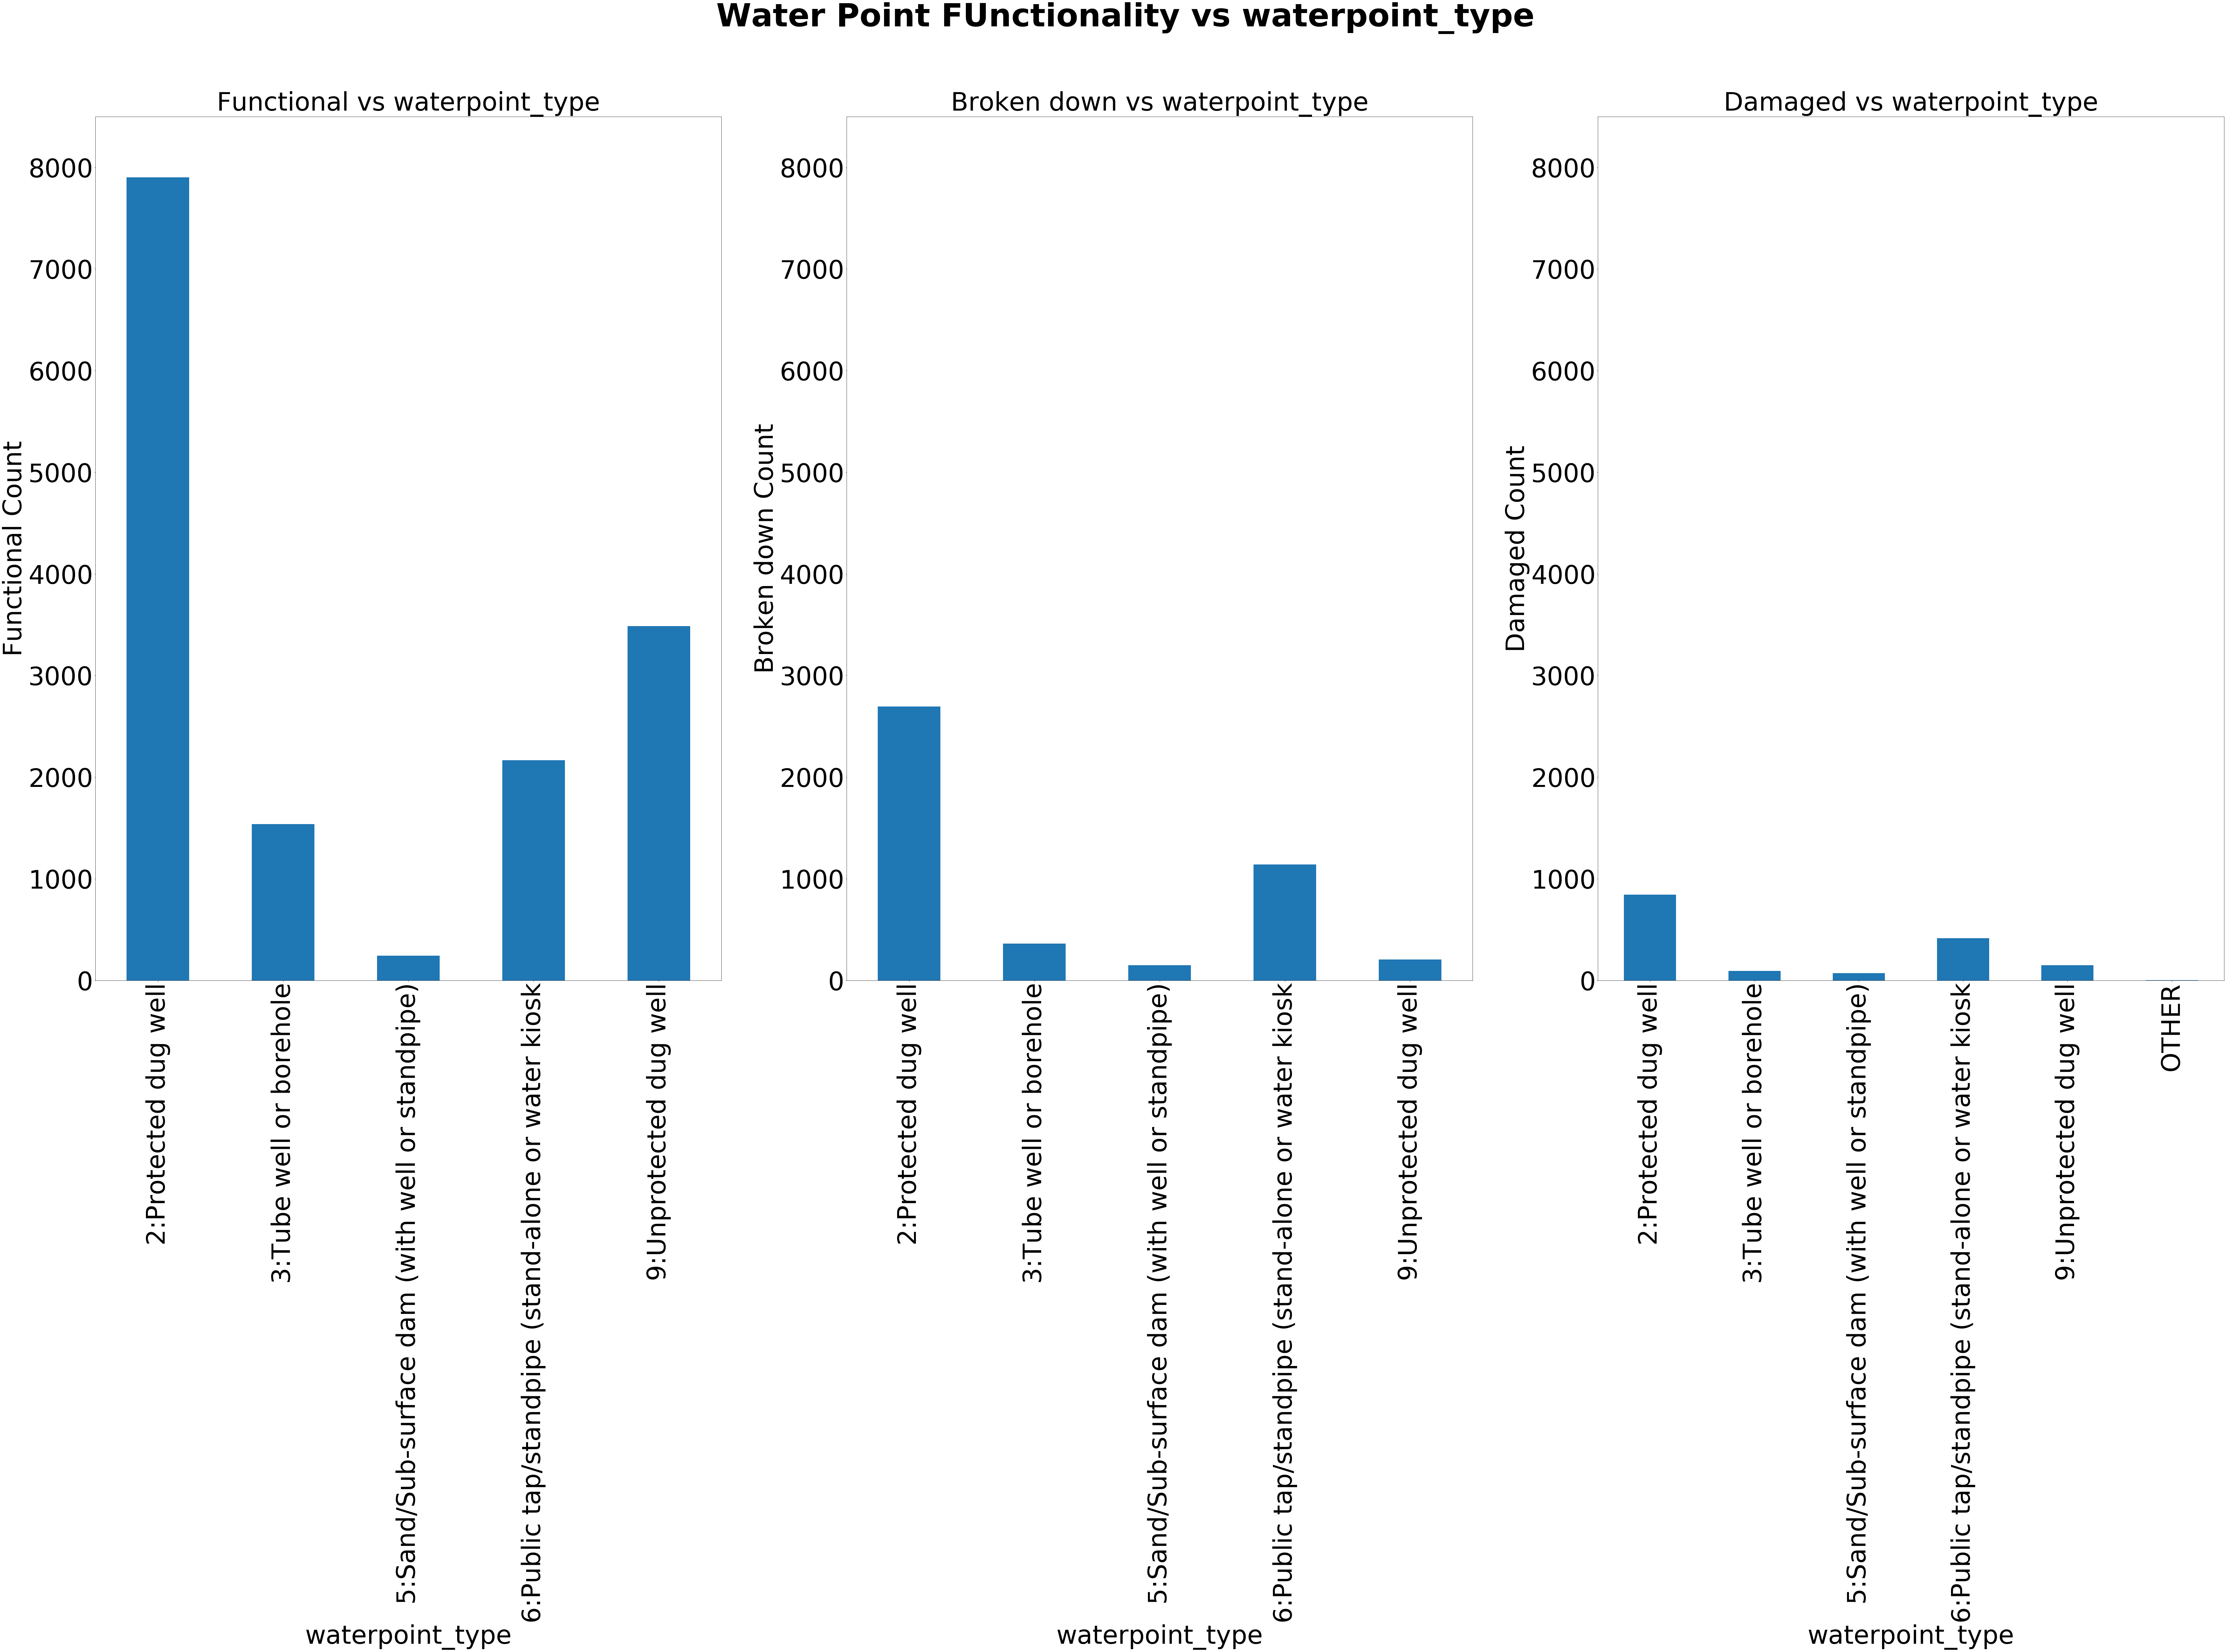

In [47]:
bar_chart_plot('waterpoint_type',8500)

In [48]:
# Saving the Preprocessed dataset into excel file

Final_Features = ['latitude','longitude','broke_down_repair','owns_water_point','management_committee','Pump_Age',
                  'extraction_type','waterpoint_type','water point functionality']

X_final = X_drop_col[Final_Features]

X_final.head()

,latitude,longitude,broke_down_repair,owns_water_point,management_committee,Pump_Age,extraction_type,waterpoint_type,water point functionality
0,7.523658,-12.500999,1:Water point has never broken down,1:Community,3:Unknown,4.0,1:Hand pump,3:Tube well or borehole,1:Yes – Functional (and in use)
2,7.253449,-11.895057,5:More than a year,1:Community,1:Yes,9.0,1:Hand pump,9:Unprotected dug well,4:No - Broken down
4,7.958622,-11.754123,1:Water point has never broken down,8:Private Individual,2:No,9.0,"7:Hand manual (e.g. rope pump, rope & bucket)",9:Unprotected dug well,1:Yes – Functional (and in use)
5,7.515611,-12.232625,1:Water point has never broken down,6:Health Facility,3:Unknown,13.0,1:Hand pump,2:Protected dug well,1:Yes – Functional (and in use)
6,7.865347,-11.193310,1:Water point has never broken down,8:Private Individual,3:Unknown,10.0,"7:Hand manual (e.g. rope pump, rope & bucket)",9:Unprotected dug well,1:Yes – Functional (and in use)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C124584508>,
      dtype=object)

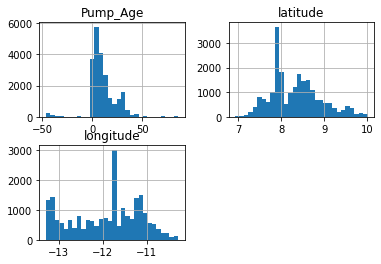

In [49]:
X_final.hist(bins=30)

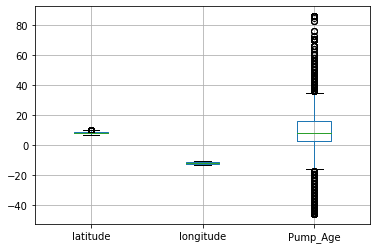

In [50]:
X_final.boxplot()

In [51]:
# Create a new excel workbook
writer = pd.ExcelWriter('Preprocessed_training_label_set_SL.xlsx', engine='xlsxwriter')

X_final.to_excel(writer, sheet_name='training-label', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()